# Titanic Dataset Data Analysis

## Data Understanding
The descriptions of the columns in the data are as follows:

1. Survived - Survival (0 = No; 1 = Yes)
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. SibSp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# loading data
data = pd.read_csv(r'C:\Users\hp\Desktop\Prodigy\Prodigy_DS_02\Data\Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Calculate percentage of missing values in respective columns
def missing_value_magnitude(data: pd.DataFrame):
    return pd.DataFrame(data.isna().sum() / data.shape[0] * 100, columns = ['%missing values'])

In [ ]:
missing_value_magnitude(data)

,%missing values
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
# Dropping 'Cabin' column, as it contains high percentage of missing values
data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# Checking the summary of the distribution of the data
display(data.describe(include=['float', 'int']))

display(data.describe(include='object'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


In [ ]:
# Age column
data[data['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [ ]:
# Creating a function for plotting histograms
def plot_histogram(data: pd.DataFrame, column_name: str):
    series_name = data[column_name]
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column_name)
    plt.axvline(x=series_name.median(), color='b', label='Median')  # Median line
    plt.axvline(x=series_name.mean(), color='r', label='Mean')  # Mean line
    plt.title(f"{column_name.title()} histogram")
    plt.legend()
    plt.show()

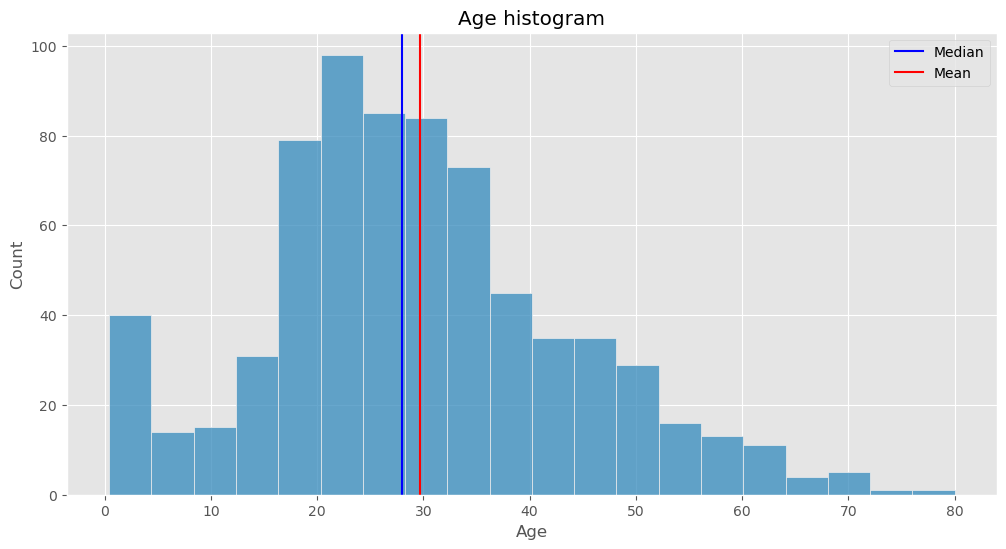

In [ ]:
# Age histogram
plot_histogram(data, 'Age')

In [ ]:
# Fare column
data[data['Fare'] > 100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C


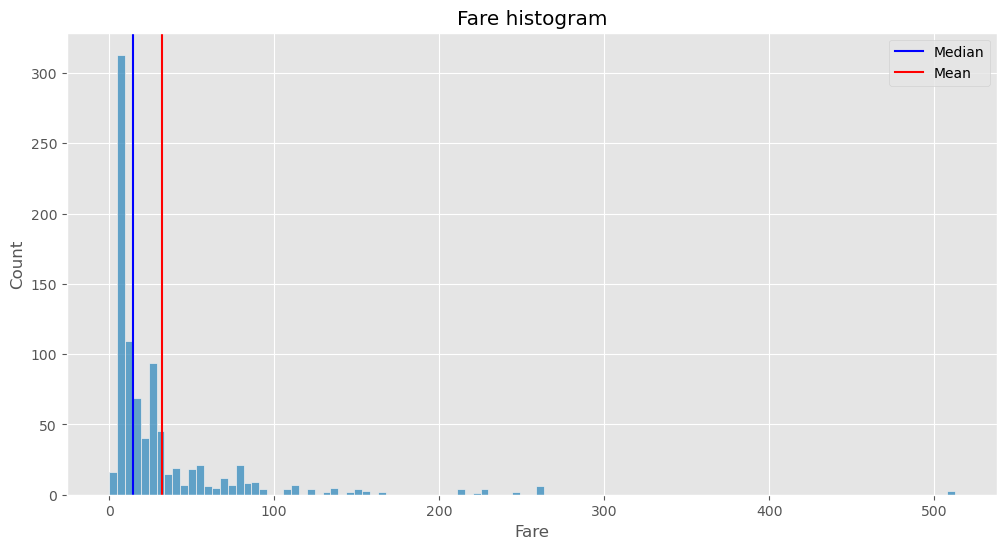

In [ ]:
# Fare histogram
plot_histogram(data, 'Fare')

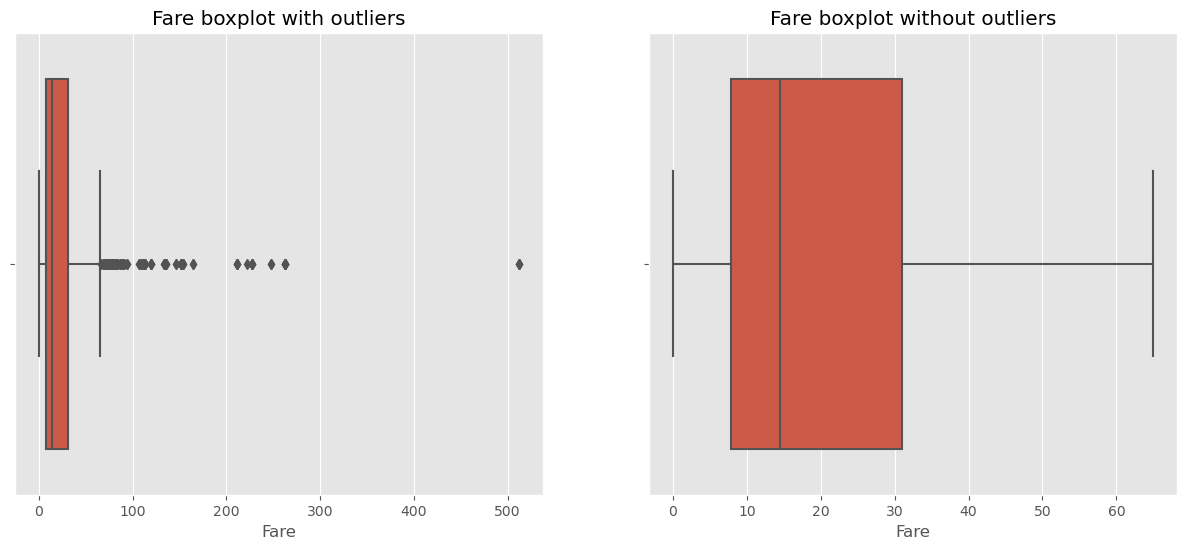

In [ ]:
# Boxplot of Fare to detect outliers
fig, ax = plt.subplots(figsize=(15, 6), ncols=2)

sns.boxplot(data=data, x='Fare', showfliers=True, ax=ax[0])
ax[0].set_title("Fare boxplot with outliers")

sns.boxplot(data=data, x='Fare', showfliers=False, ax=ax[1])
ax[1].set_title("Fare boxplot without outliers")
plt.show()

In [ ]:
# Subsetting records with Fare being less than 300
data = data[data['Fare'] < 300].copy()

In [ ]:
# Ticket column
data['Ticket'].value_counts().reset_index().query("Ticket >= 1").head()

,index,Ticket
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [ ]:
data['Ticket'].duplicated().sum() / data.shape[0]

0.23423423423423423

In [ ]:
# Embarked column
data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().merge(data['Embarked'].value_counts().reset_index().rename(columns={'Embarked': 'Total Passengers', 'index': 'Embarked'}), on='Embarked', how='left')

,Embarked,Survived,Total Passengers
0,C,0.545455,165
1,Q,0.389610,77
2,S,0.336957,644


In [ ]:
# Dropping 'Ticket' column
data.drop('Ticket', axis = 1, inplace = True)

In [ ]:
# Filling missing values with median
data.fillna({'Age': data['Age'].median(), 'Fare': data['Fare'].median(), 'Embarked': data['Embarked'].mode()[0]}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Fare         888 non-null    float64
 9   Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.3+ KB


In [ ]:
# Correcting datatypes
data['Pclass'] = data['Pclass'].astype(dtype='object')
data['SibSp'] = data['SibSp'].astype(dtype='object')
data['Parch'] = data['Parch'].astype(dtype='object')

## Exploratory Data Analysis (EDA)

In [ ]:
# Dropping 'Name' and 'PassengerId' columns
data.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Creating a pivot table function for survival rates
def survival_pivot_table(values: str, index: str, columns: str=None, data=data):
    if isinstance(index, list):
        index = tuple(index)
    table = pd.pivot_table(data, values=values, index=index, columns=columns, aggfunc=['mean', 'count'])
    display(table)

In [ ]:
# Pivot table for survival rates based on sex
survival_pivot_table(values='Survived', index='Sex')

,mean,count
,Survived,Survived
Sex,,
female,0.741214,313
male,0.186087,575


In [ ]:
# Pivot table for survival rates based on passenger class
survival_pivot_table(values='Survived', index='Pclass')

,mean,count
,Survived,Survived
Pclass,,
1,0.624413,213
2,0.472826,184
3,0.242363,491


In [ ]:
# Pivot table for Passenger class and sex
survival_pivot_table(values='Survived', index='Pclass', columns='Sex')

mean            count     
Sex       female      male female male
Pclass                                
1       0.967742  0.358333     93  120
2       0.921053  0.157407     76  108
3       0.500000  0.135447    144  347

In [ ]:
# Pivot table for survival rates based on port of embarkation
survival_pivot_table(values='Survived', index='Embarked')

,mean,count
,Survived,Survived
Embarked,,
C,0.545455,165
Q,0.389610,77
S,0.339009,646


In [ ]:
# Pivot table for survival rates based on port of embarkation and sex
survival_pivot_table(values='Survived', index='Embarked', columns='Sex')

mean            count     
Sex         female      male female male
Embarked                                
C         0.875000  0.290323     72   93
Q         0.750000  0.073171     36   41
S         0.692683  0.174603    205  441

In [ ]:
# Pivot table for survival based on SibSp
survival_pivot_table(values='Survived', index='SibSp')

,mean,count
,Survived,Survived
SibSp,,
0,0.342149,605
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [ ]:
# Pivot table for survival based on SibSp
survival_pivot_table(values='Survived', index='Parch')

,mean,count
,Survived,Survived
Parch,,
0,0.341716,676
1,0.547009,117
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


We will have to segment the Ages into classes: These are:

1. Children - 0-18
2. Youth - 18-35
3. Middle-aged - 35-60
4. Elderly - 60 and above

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Creating agegroup column with empty string
data['AgeGroup'] = ''

# Creating the age group segments
data.loc[data['Age'] < 18, 'AgeGroup'] = 'Child'
data.loc[(data['Age'] >= 18) & (data['Age'] < 35), 'AgeGroup'] = 'Youth'
data.loc[(data['Age'] >= 35) & (data['Age'] < 60), 'AgeGroup'] = 'Middle Age'
data.loc[data['Age'] >= 60, 'AgeGroup'] = 'Elderly'

# Checking distribution in AgeGroup column
data['AgeGroup'].value_counts()

Youth         543
Middle Age    206
Child         113
Elderly        26
Name: AgeGroup, dtype: int64

In [ ]:
# Pivot table for survival rates based on age group
survival_pivot_table(values='Survived', index='AgeGroup')

,mean,count
,Survived,Survived
AgeGroup,,
Child,0.539823,113
Elderly,0.269231,26
Middle Age,0.407767,206
Youth,0.344383,543


In [ ]:
# Survival rates in general
data['Survived'].value_counts(normalize=True)

0    0.618243
1    0.381757
Name: Survived, dtype: float64

In [ ]:
# Pivot table for survival rates based on Sex
data['SurvivedClass'] = data['Survived'].astype('object')

data.groupby(by=['SurvivedClass', 'Sex'])['Survived'].count()

SurvivedClass  Sex   
0              female     81
               male      468
1              female    232
               male      107
Name: Survived, dtype: int64

In [ ]:
print(f"Percentage of Women out of all passengers that survived: {round((232 / (232+107)), 4)}")

Percentage of Women out of all passengers that survived: 0.6844


## Conclusions

1. In general there was a ~38% survival rate in the Titanic.
2. Out of all passengers that survived ~68% of them were women.
3. The higher the passenger class the higher the chance of survival was.
4. Children (passengers below age 18) had the highest survival rate out of all other age groups.